Classical Dynamics Freefall Motion

Bailey Ritchie, Ethan Jeffs, Tadhg Buma



In [25]:
# Creating the particle (Felix) as a particle
import math
import numpy as np
from matplotlib import pyplot

class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt

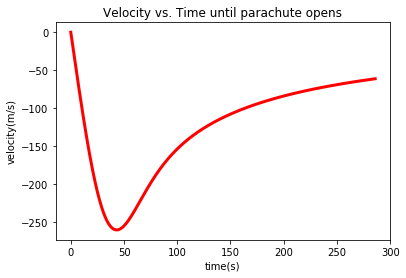

In [26]:
# Situation 1 - where g is not dependent on altitude

g = 9.81            # g acceleration
mass = 100          # mass of Felix kg with suit
y0 = 38969.4          # initial position #38,969.4 meters #ytot= 36,402.6 #meters he fell 
v0 = 0.            # initial velocity
Cd=0.47            # Coefficient for a sphere
Area= 4*math.pi*(1.7018/6)**2 #his surface area as he falls

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]

dt = 0.01           # time step
gforce = g*mass    # weight
p = particle(mass, y0, v0)

def calcRho(y): #calculates how rho changes with altitude
    rho = 1.4477*math.e**(-1*y*10**(-4))
    return rho

while p.y > 2567: # describes motion until he releases parachute
    vt=-((2*mass*g/(Cd*calcRho(p.y)*Area))**.5) #terminal velocity
    k2= g*mass/((vt)**2)  
    fy = -gforce-k2*p.v*abs(p.v)
    p.euler_cromer(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

# Velocity Plot
pyplot.title('Velocity vs. Time until parachute opens')
pyplot.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('velocity(m/s)');

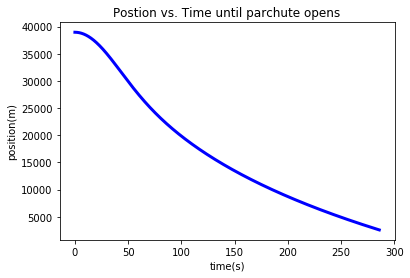

In [27]:
# Position Plot
pyplot.title('Postion vs. Time until parchute opens')
pyplot.plot(t_data, y_data, color="#0000FF", ls='-', lw=3)
pyplot.ylabel('position(m)');
pyplot.xlabel('time(s)');

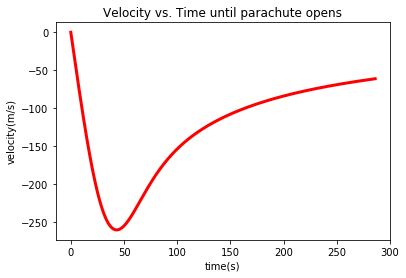

In [28]:
# Situation 2 - where g is dependent on altitude
mass = 100          # mass of Felix
y0 = 38969.4          # initial position #38,969.4 meters #ytot= 36,402.6 #meters he fell 
v0 = 0.            # initial velocity
Cd=0.47           # Coefficient for sphere

Area= 4*math.pi*(1.7018/6)**2 #his surface area as he falls

dt = 0.01           # time step
gforce = g*mass    # weight
p = particle(mass, y0, v0)

y = [y0] 
v = [v0]
t = [0.]

# how acceleration of gravity changes with altitude
def calcGrav(y):
    accel=(7*10**-13)-(3*10**-6) + 9.8067 
    return accel

#calculates how rho changes with altitude
def calcRho(y):
    rho= 1.4477*math.e**(-1*y*10**(-4))
    return rho

while p.y > 2567:
    vt=-((2*mass*calcGrav(p.y)/(Cd*calcRho(p.y)*Area))**.5) #terminal velocity
    k2= g*mass/vt**2 
    fy = -gforce-k2*p.v*abs(p.v)
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)


pyplot.title('Velocity vs. Time until parachute opens')
pyplot.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('velocity(m/s)');


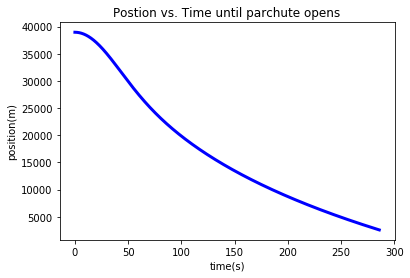

In [29]:
pyplot.title('Postion vs. Time until parchute opens')
pyplot.plot(t_data, y_data, color="#0000FF", ls='-', lw=3)
pyplot.ylabel('position(m)');
pyplot.xlabel('time(s)');

In [23]:
# Estimated time and distance data
print("Accounting for both changing density of air and acceleration of gravity... \n")

print("Felix traveled for an approximated",round(t_data[-1],3),"seconds before releasing his parachute. \n")

print("Felix traveled",round(y_data[0]-y_data[-1],3),"meters before releasing his parachute. \n")

print("Felix had a maximum speed of",round(-1*min(v_data),3),"meters/second before releasing his parachute. \n")


Accounting for both changing density of air and acceleration of gravity... 

Felix traveled for an approximated 285.95 seconds before releasing his parachute. 

Felix traveled 36402.74 meters before releasing his parachute. 

Felix had a maximum speed of 260.558 meters/second before releasing his parachute. 

